In [1]:
from lib.Environment import DeepTradingEnvironment
import datetime 
# parameters related to the transformation of data, this parameters govern an step before the algorithm
meta_parameters = {"in_bars_count": 30,
                   "out_reward_window": datetime.timedelta(minutes=10),
                   "state_type":"in_window_out_window"}

# parameters that are related to the objective/reward function construction
objective_parameters = {"percent_commission": .001}
print("===Meta Parameters===")
print(meta_parameters)
print("===Objective Parameters===")
print(objective_parameters)



===Meta Parameters===
{'in_bars_count': 30, 'out_reward_window': datetime.timedelta(seconds=600), 'state_type': 'in_window_out_window'}
===Objective Parameters===
{'percent_commission': 0.001}


In [2]:

assets_simulation_details={"asset_1":{"method":"GBM","sigma":.1,"mean":.1},
                    "asset_2":{"method":"GBM","sigma":.2,"mean":.2}}

env_2=DeepTradingEnvironment.build_environment_from_simulated_assets(assets_simulation_details=assets_simulation_details,data_hash="simulation_gbm",
                                                                     meta_parameters=meta_parameters,objective_parameters=objective_parameters)


In [3]:
test_data=env_2.features[['asset_1_close_price','asset_2_close_price']].copy()
test_data.columns = ['asset_1', 'asset_2']
test_data

,asset_1,asset_2
2020-09-27 02:40:00,0.997104,1.006498
2020-09-28 02:40:00,1.000092,1.011276
2020-09-29 02:40:00,1.007292,0.994989
2020-09-30 02:40:00,1.003013,0.974688
2020-10-01 02:40:00,0.992764,0.986185
...,...,...
2023-06-19 02:40:00,1.718511,1.859084
2023-06-20 02:40:00,1.728925,1.907358
2023-06-21 02:40:00,1.744808,1.893801
2023-06-22 02:40:00,1.731648,1.903404


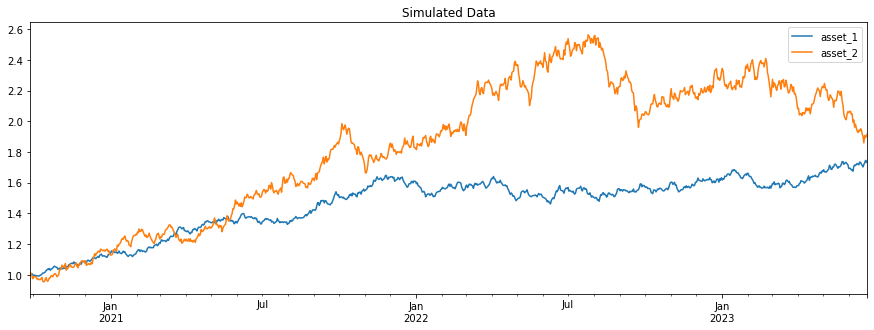

In [4]:
test_data.plot(figsize=(15,5),title="Simulated Data")

In [5]:
from lib.DataHandling import DailyDataFrame2Features

data_handler=DailyDataFrame2Features(test_data,configuration_dict={},
                                     forward_returns_time_delta=[datetime.timedelta(minutes=10),
                                                                datetime.timedelta(minutes=30)])


In [6]:
data_handler.all_features

,asset_1_100_days_ma,asset_1_12m1_past_return,asset_1_1m_past_return,asset_1_200_days_ma,asset_1_3m_past_return,asset_1_50_days_ma,asset_1_bollinger_up,asset_1_bollinger_mid,asset_1_bollinger_low,asset_1_close_price,...,asset_2_bollinger_up,asset_2_bollinger_mid,asset_2_bollinger_low,asset_2_close_price,asset_2_ewma_vol,asset_2_fraction_diff,asset_2_log_returns,asset_2_rsi,asset_2_forward_return_0:10:00,asset_2_forward_return_0:30:00
2020-09-27 02:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.997104,...,NaN,NaN,NaN,1.006498,NaN,NaN,NaN,NaN,0.004747,0.004747
2020-09-28 02:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000092,...,NaN,NaN,NaN,1.011276,0.053637,NaN,0.004736,NaN,-0.016105,-0.016105
2020-09-29 02:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.007292,...,NaN,NaN,NaN,0.994989,0.181888,NaN,-0.016236,NaN,-0.020403,-0.020403
2020-09-30 02:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.003013,...,NaN,NaN,NaN,0.974688,0.232893,NaN,-0.020614,NaN,0.011796,0.011796
2020-10-01 02:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.992764,...,NaN,NaN,NaN,0.986185,0.128684,NaN,0.011726,NaN,0.001633,0.001633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-19 02:40:00,0.965113,0.097392,0.008308,0.952958,0.071750,0.992316,1.741881,1.709132,1.676383,1.718511,...,2.102396,1.981246,1.860096,1.859084,0.487124,0.517195,-0.022879,25.019731,0.025966,0.025966
2023-06-20 02:40:00,0.960199,0.083804,0.015685,0.947555,0.075127,0.986991,1.742787,1.709435,1.676082,1.728925,...,2.095902,1.974594,1.853287,1.907358,0.536474,0.578554,0.025635,36.529810,-0.007108,-0.007108
2023-06-21 02:40:00,0.952416,0.079327,0.022225,0.939257,0.095394,0.978701,1.747314,1.710787,1.674261,1.744808,...,2.085789,1.966548,1.847306,1.893801,0.160566,0.561314,-0.007133,34.909034,0.005071,0.005071
2023-06-22 02:40:00,0.960432,0.106940,0.007878,0.946730,0.090646,0.986851,1.749234,1.712664,1.676094,1.731648,...,2.074510,1.959316,1.844123,1.903404,0.107379,0.574310,0.005058,37.040071,0.007809,0.007809


In [7]:
from lib.DataHandling import DailySeries2Features

env_3=DeepTradingEnvironment.build_environment_from_dirs_and_transform(meta_parameters=meta_parameters, objective_parameters=objective_parameters, data_hash="ief_spy", data_dir="data_env")

env_3.__dict__


{'features':                            ief.parquet_close_price  ief.parquet_log_returns  \
 time                                                                          
 2010-01-04 14:30:00+00:00                 71.85493                      NaN   
 2010-01-04 14:35:00+00:00                 71.89541                 0.000563   
 2010-01-04 14:40:00+00:00                 71.90351                 0.000113   
 2010-01-04 14:45:00+00:00                 71.85493                -0.000676   
 2010-01-04 14:50:00+00:00                 71.83063                -0.000338   
 ...                                            ...                      ...   
 2020-08-26 15:35:00+00:00                121.46500                 0.000123   
 2020-08-26 15:40:00+00:00                121.45000                -0.000123   
 2020-08-26 15:45:00+00:00                121.44500                -0.000041   
 2020-08-26 15:50:00+00:00                121.45000                 0.000041   
 2020-08-26 15:55:00+00:00  